# Homework 2
### CSE 802
### David Rackerby

1. Consider a set of 1-dimensional feature values (i.e., points) pertaining to a class that is available here.

(a) [3 points] Plot the histogram of these points using a bin size of 2, i.e., each bin should have a range
of 2. Normalize the histogram so that the sum of the histogram values equals 1.

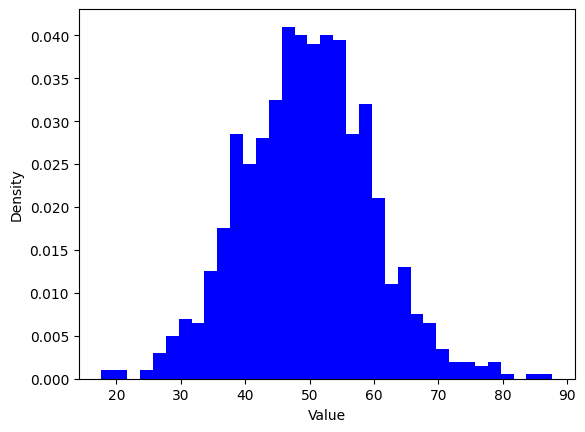

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def grab_data(filename: str) -> np.ndarray:
    with open(filename) as file:
        return np.array(file.read().splitlines()).astype(np.float64)

data = grab_data("data_01.txt")
plt.hist(data, color='blue', bins=np.arange(min(data), max(data) + 2, 2), density=True)
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

(b) [4 points] Compute and report the mean and the (biased) variance of these points.

In [2]:
mean = np.mean(data)
variance = np.var(data)
print(f"Mean: {mean}\nVariance: {variance}")

Mean: 49.673675
Variance: 99.693624033375


(c) [3 points] Assuming that the given points are generated by an underlying Gaussian distribution,
plot the pdf function on the same graph as (a). (Hint: Use the computed values for the mean and
variance as parameters of the Gaussian).

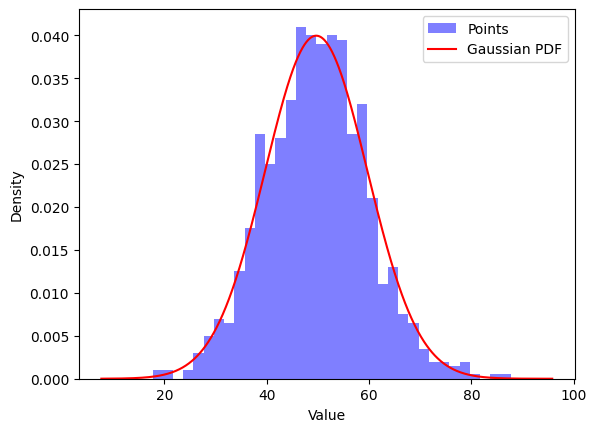

In [3]:
def gaussian(x: np.float64, mu: np.float64, sigma_sq: np.float64) -> np.float64:
    return (1/ np.sqrt(2 * np.pi * sigma_sq)) * np.exp(-0.5 * np.square(x - mu) / sigma_sq)

x = np.linspace(min(data) - 10, max(data) + 10, 1000)
plt.hist(data, alpha=0.5, color='blue', bins=np.arange(min(data), max(data) + 2, 2), density=True, label='Points')
plt.plot(x, gaussian(x, mu=mean, sigma_sq=variance), color='red', label='Gaussian PDF')
plt.legend(loc='upper right')
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

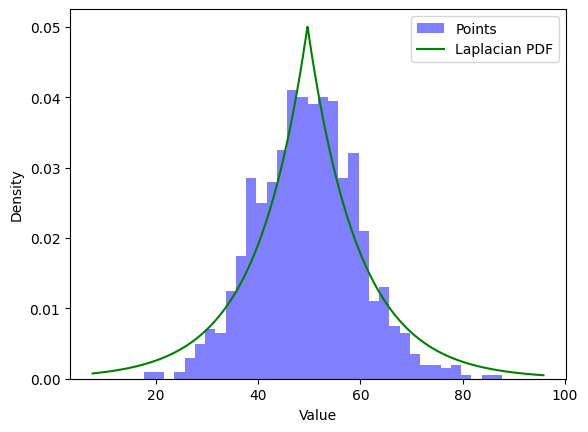

In [4]:
def laplacian(x: np.float64, mu: np.float64, sigma: np.float64) -> np.float64:
    return (1/ (2 * sigma)) * np.exp(-np.abs(x - mu) / sigma)

plt.hist(data, alpha=0.5, color='blue', bins=np.arange(min(data), max(data) + 2, 2), density=True, label='Points')
plt.plot(x, laplacian(x, mu=mean, sigma=np.sqrt(variance)), color='green', label='Laplacian PDF')
plt.legend(loc='upper right')
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

(e) [2 points] By visual examination, which of the two parametric distributions better fit the data?

The Gaussian distribution appears to fit the data better, as the histogram itself tends to stay closer to the Gaussian distribution function compared to the Laplacian distribution function.

2. Consider the problem of distinguishing between two classes of fish - ω1 and ω2 - based on their length.
You can assume that these are the only two classes of fish in nature and that the length of the fish is a
discrete integral value! The probability of observing a fish from class ω1 is 0.6 and the probability of
observing a fish from class ω2 is 0.4. The probability of encountering a fish of length 10 inches, given
that it is from class ω1, is 0.2. Similarly, the probability of encountering a fish of length 10 inches, given
that it is from class ω2, is 0.4.

(a) [5 points] Based on this information, compute the probability of encountering a fish of any class of
length 10 inches?

Let $x = 10$. Given that $p(x) = \sum_{j=1}^{c}p(x|\omega_j)P(\omega_j)$,
$p(x) = p(x|\omega_1)P(\omega_1) + p(x|\omega_2)P(\omega_2) = 0.2\times 0.6 + 0.4\times 0.4 = 0.28$.
The probability of observing a fish of length 10 is 0.28.

b) [5 points] Based on the Bayes decision rule, to which class will a fish of length 10 inches be assigned
to?

For two classes, the following Bayes decision rule applies:
Decide $\omega_1$ if $p(x|\omega_1)P(\omega_1) > p(x|\omega_2)P(\omega_2)$, otherwise decide $\omega_2$. Note we removed the evidence in the comparison, since it is a factor of both compared terms.
$p(x|\omega_1)P(\omega_1) = 0.2\times 0.6 = 0.12$ and $p(x|\omega_2)P(\omega_2) = 0.4\times 0.4 = 0.16$. Therefore, we assign the 10-inch long fish to class $\omega_2$

3. [10 points] Consider a 1-dimensional classification problem involving two categories ω1 and ω2 such
that P(ω1) = 2/3 and P(ω2) = 1/3. Assume that the classification process can result in one of three
actions:
α1 - choose ω1;
α2 - choose ω2;
α3 - do not classify.
Consider the following loss function, λ:
λ(α1|ω1) = λ(α2|ω2) = 0;
λ(α2|ω1) = λ(α1|ω2) = 1;
λ(α3|ω1) = λ(α3|ω2) = 1/4.
For a given feature value x, assume that p(x|ω1) = (2−x)/2 and p(x|ω2) = 1/2. Here, 0 ≤ x ≤ 2.
Based on the Bayes minimum risk rule, what action will be taken when encountering the value x = 0.45?

In [5]:
def evidence(x):
    return pdf_w1(x) * prior_w1() + pdf_w2() * prior_w2()

def loss(alpha, omega) -> float:
    if alpha not in range(1, 4) or omega not in range(1, 3):
        raise Exception("Invalid class and/or action provided")
    if alpha == omega:
        return 0
    if alpha == 3:
        return 0.25
    return 1

def pdf_w1(x: float) -> float:
    return (2 - x) / 2

def pdf_w2() -> float:
    return 0.5

def prior_w1() -> float:
    return 2/3

def prior_w2() -> float:
    return 1/3

classes = 2
actions = 3

risks = [None] * actions
for i in range(actions):
    r_i = 0
    for j in range(classes):
        posterior = (pdf_w1(0.45) * prior_w1() if j+1 == 1 else pdf_w2() * prior_w2()) / evidence(0.45)
        r_i += loss(alpha=i+1, omega=j+1) * posterior
    risks[i] = r_i
for action, value in enumerate(risks):
    print(f"Risk of action {action + 1}: {value}")

Risk of action 1: 0.24390243902439027
Risk of action 2: 0.7560975609756098
Risk of action 3: 0.25


Action $\alpha_1$ has the minimum risk, therefore that action will be taken.

4. Consider a two-class one-dimensional classification problem with the following class-conditional densities:
p(x|ω1) = 2 − 2x, x ∈ [0, 1]
p(x|ω2) = 2x, x ∈ [0, 1]

(a) [2 points] Plot these two densities in the same graph.

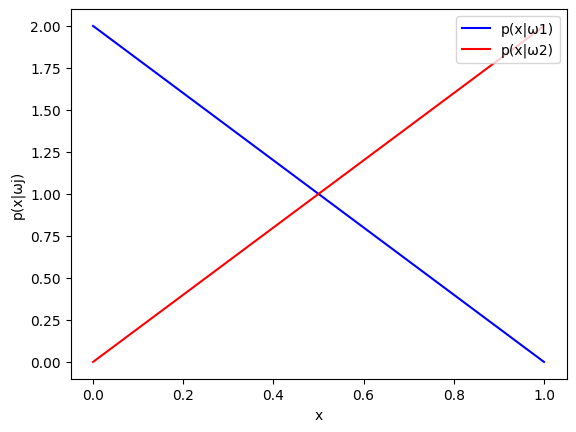

In [6]:
x = np.linspace(0, 1, 100)

def pdf_w1(x):
    return 2 - 2*x

def pdf_w2(x):
    return 2*x

plt.plot(x, pdf_w1(x), color='blue', label='p(x|ω1)')
plt.plot(x, pdf_w2(x), color='red', label='p(x|ω2)')
plt.legend(loc='upper right')
plt.xlabel("x")
plt.ylabel("p(x|ωj)")
plt.show()

(b) [3 points] Let P(ω1) = P(ω2) = 1/2. Assuming a 0-1 loss function, compute the Bayes decision
boundary and derive the Bayes decision rule. Mark the decision boundary and decision regions on the
figure in (a).

Here we show that, in the scenario of equal priors and a 0-1 loss function, the minimum risk rule collapses to comparing the class-conditional pdfs. Start with the following decision rule:
Assign $x$ to $\omega_1$ if $R(\alpha_1 | x) < R(\alpha_2 | x)$; $\omega_2$ otherwise
$$\implies \lambda_{11}P(\omega_1 | x) + \lambda_{12}P(\omega_2 | x) < \lambda_{21}P(\omega_1 | x) + \lambda_{22}P(\omega_2 | x)$$
$$\implies (\lambda_{21} - \lambda_{11})P(\omega_1 | x) > (\lambda_{12} - \lambda_{22})P(\omega_2 | x)$$
Note since $\lambda_{21} - \lambda{11}$ is positive, we rewrite the inequality as below
$$\implies \frac{P(\omega_1 | x)}{P(\omega_2 | x)} > \frac{\lambda_{12} - \lambda_{22}}{\lambda_{21} - \lambda_{11}}$$
$$\implies \frac{p(x | \omega_1)P(\omega_1)p(x)}{p(x | \omega_2)P(\omega_2) p(x)} > \frac{\lambda_{12} - \lambda_{22}}{\lambda_{21} - \lambda_{11}}$$
Observe that when rewriting the posteriors via Bayes' formula, the evidence factor cancels out. Additionally, the priors also cancel out due to being equal.
$$\implies \frac{p(x | \omega_1)}{p(x | \omega_2)}> \frac{\lambda_{12} - \lambda_{22}}{\lambda_{21} - \lambda_{11}}$$
Due to our assumption of zero-one loss functions, the right side of the inequality resolves to 1:
$$\implies \frac{p(x | \omega_1)}{p(x | \omega_2)}> 1$$
$$\implies p(x | \omega_1) > p(x | \omega_2)$$
$$\implies 2-2x > 2x$$
$$\implies x < \frac{1}{2}$$
Thus, the decision rule is interpreted as "assign $x$ to class $\omega_1$ if $x$ is less than 0.5; otherwise assign $x$ to $\omega_2$."
The decision boundary and decision regions follow from this rule:

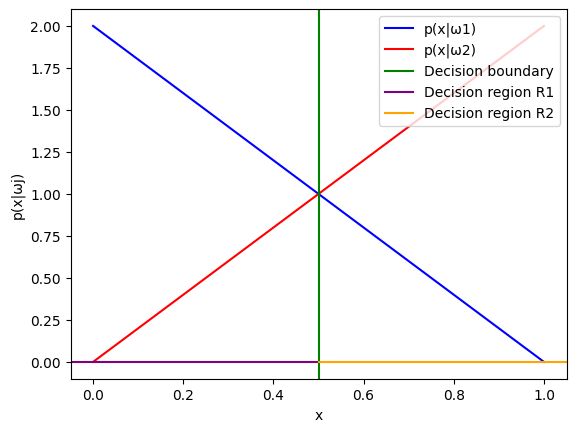

In [7]:
plt.plot(x, pdf_w1(x), color='blue', label='p(x|ω1)')
plt.plot(x, pdf_w2(x), color='red', label='p(x|ω2)')
plt.axvline(0.5, color='green', label='Decision boundary')
plt.axhline(0, xmax=0.5, color='purple', label='Decision region R1')
plt.axhline(0, xmin=0.5, color='orange', label='Decision region R2')
plt.legend(loc='upper right')
plt.xlabel("x")
plt.ylabel("p(x|ωj)")
plt.show()

Note: the decision boundary itself is a one-dimensional point, but a line was drawn for visualization purposes.

(c) [3 points] Let P(ω1) = P(ω2) = 1/2. Suppose the loss function is defined as follows: λ11 = λ22 = 0,
λ12 = 2 and λ21 = 1. Derive the Bayes decision boundary and the Bayes decision rule. Note that λi j
represents the loss incurred when a sample from class ωj is classified as ωi . Mark the decision boundary
and decision regions on the figure in (a).

The derivation is nearly identical to before, except without the assumption of zero-one loss functions, the decision boundary shifts slightly:
$$\implies \frac{p(x | \omega_1)}{p(x | \omega_2)}> \frac{\lambda_{12} - \lambda_{22}}{\lambda_{21} - \lambda_{11}}$$
$$\implies \frac{p(x | \omega_1)}{p(x | \omega_2)}> 2$$
$$\implies p(x | \omega_1) > 2p(x | \omega_2)$$
$$\implies 2-2x > 4x$$
$$\implies x < \frac{1}{3}$$


The decision rule is "assign $x$ to class $\omega_1$ if $x$ is less than $\frac{1}{3}$; otherwise assign $x$ to $\omega_2$." See the decision boundary and decision regions below:

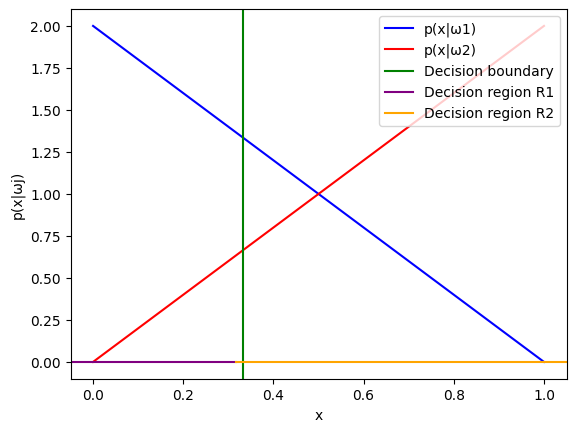

In [8]:
plt.plot(x, pdf_w1(x), color='blue', label='p(x|ω1)')
plt.plot(x, pdf_w2(x), color='red', label='p(x|ω2)')
plt.axvline(1/3, color='green', label='Decision boundary')
plt.axhline(0, xmax=1/3, color='purple', label='Decision region R1')
plt.axhline(0, xmin=1/3, color='orange', label='Decision region R2')
plt.legend(loc='upper right')
plt.xlabel("x")
plt.ylabel("p(x|ωj)")
plt.show()

(d) [2 points] Intuitively explain why the boundaries in (b) and (c) are different.

In plain terms, the decision boundary has shifted to classify more samples as belonging to class $\omega_2$. Recall that the loss function $\lambda_{ij}$ is, in simple terms, the cost of classifying an object that is actually from class $\omega_j$ as class $\omega_i$. By increasing $\lambda_{12}$, it has become more costly to misclassify something from class $\omega_2$ as $\omega_1$. Therefore, the decision boundary has shifted to account for this increased cost of misclassification and tries to reduce the cost incurred.

5. Consider the three-dimensional normal distribution p(x ) ∼ N (μ, Σ), where μ = (1, 1, 1)t and Σ =
[1 0 0]
[0 5 2]
[0 2 5].

(a) [2 points] Compute and report the determinant of the covariance matrix, i.e., | Σ |.

In [9]:
cov = np.array(
    [
        [1, 0, 0],
        [0, 5, 2],
        [0, 2, 5]
    ]
)
np.linalg.det(cov)

21.0

(b) [2 points] Compute and report the inverse of the covariance matrix, i.e., Σ−1.

In [10]:
cov_inv = np.linalg.inv(cov)
cov_inv

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.23809524, -0.0952381 ],
       [ 0.        , -0.0952381 ,  0.23809524]])

(c) [3 points] Compute and report the eigen-vectors and eigen-values of the covariance matrix.

In [11]:
vals, vecs = np.linalg.eig(cov)
print(f"Eigenvalue {vals[0]} Eigenvector {vecs[:,0]}\nEigenvalue {vals[1]} Eigenvector {vecs[:,1]}\nEigenvalue {vals[2]} Eigenvector {vecs[:,2]}\n")

Eigenvalue 7.0 Eigenvector [0.         0.70710678 0.70710678]
Eigenvalue 3.0000000000000004 Eigenvector [ 0.          0.70710678 -0.70710678]
Eigenvalue 1.0 Eigenvector [1. 0. 0.]



(d) [3 points] Compute and report the density value at (0, 0, 0)t and at (5, 5, 5)t .

In [12]:
def multivariate_gaussian_pdf(*, x: np.ndarray, mu: np.ndarray, sigma: np.ndarray) -> np.float64:
    return np.exp(-0.5 * ((x - mu).T @ np.linalg.inv(sigma) @ (x - mu))) / (((2 * np.pi) ** (len(x) / 2)) * (np.linalg.det(sigma) ** 0.5))

mu = np.array([1, 1, 1])

print(f"pdf at (0, 0, 0)^t: {multivariate_gaussian_pdf(x=np.array([0, 0, 0]), mu=mu, sigma=cov)}")
print(f"pdf at (5, 5, 5)^t: {multivariate_gaussian_pdf(x=np.array([5, 5, 5]), mu=mu, sigma=cov)}")


pdf at (0, 0, 0)^t: 0.007285028251300052
pdf at (5, 5, 5)^t: 4.727065209212492e-07


(e) [2 points] Compute the Euclidean Distance between μ and the point (5, 5, 5)t .

In [13]:
np.linalg.norm(mu - np.array([5, 5, 5]))

6.928203230275509

(f) [3 points] Compute the Mahalanobis Distance between μ and the point (5, 5, 5)t .

In [14]:
def mahalanobis_distance(*, x: np.ndarray, mu: np.ndarray, sigma: np.ndarray) -> np.float64:
    return (x - mu).T @ np.linalg.inv(sigma) @ (x - mu)

mahalanobis_distance(x=np.array([5, 5, 5]), mu=mu, sigma=cov)

20.57142857142857

6. [10 points] Consider the following class-conditional densities for a three-class problem involving two-
dimensional features:
p(x |ω1) ∼ N ((−1, −1)t , I) ;
p(x |ω2) ∼ N ((1, 1)t , I) ;
p(x |ω3) ∼ 1/2 N ((0.5, 0.5)t , I) + 1/2 N ((−0.5, −0.5)t , I) .
(Here, class ω3 conforms to a Gaussian Mixture Model (GMM) with two components - one component
is N ((0.5, 0.5)t , I) and the other component is N ((−0.5, −0.5)t , I) - whose weights are equal (i.e., 1/2 ).
Note that a GMM is not a Gaussian Distribution).

(a) In a 2D graph, mark the mean of ω1, ω2, and the two components of ω3. In the same graph, mark
the point x = (0.1, 0.1)t .

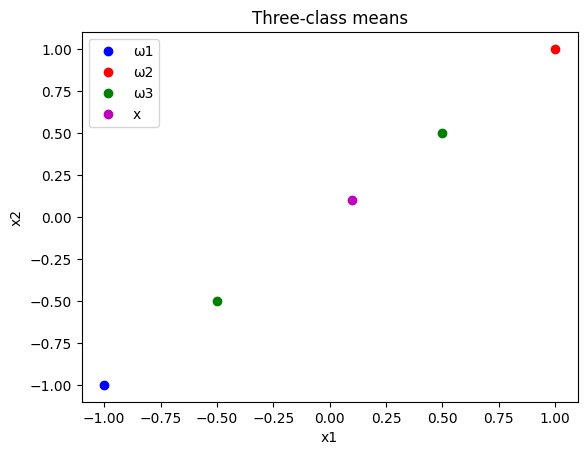

In [15]:
plt.title('Three-class means')
plt.plot(-1, -1, 'bo', label='ω1')
plt.plot(1, 1, 'ro', label='ω2')
plt.plot([0.5, -0.5], [0.5, -0.5], 'go', label='ω3')
plt.plot(0.1, 0.1, 'mo', label='x')
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

(b) Assuming a 0-1 loss function and equal priors, determine the class to which you will assign the
two-dimensional point x = (0.1, 0.1)t based on the Bayes decision rule.

We will derive expressions for the discriminant functions for all three classes. Under the assumption of a zero-one loss function, we will use a class's posterior probability as its respective discriminant function.
$g_i(x) = P(\omega_i | x) = \frac{p(x|\omega_i)P(\omega_i)}{p(x)}$
Note that the evidence is a scalar in each discriminant function such that it can be removed and the expression can be simplified:
$g_i(x) = p(x|\omega_i)P(\omega_i)$
Additionally, all priors are equal and can be removed to further simplify the discriminant function in terms of the class-conditional pdf
$g_i(x) = p(x|\omega_i)$
Given all class-conditional pdfs, and our knowledge that they are multivariate gaussian distributions, we can do a simple comparison of each density value and check which class has the highest density.

In [16]:
x = np.array([0.1, 0.1])
identity = np.array([
    [1, 0],
    [0, 1],
])
w1_at_x = multivariate_gaussian_pdf(x=x, mu=np.array([-1, -1]), sigma=identity)
w2_at_x = multivariate_gaussian_pdf(x=x, mu=np.array([1, 1]), sigma=identity)
w3_at_x = 0.5*(multivariate_gaussian_pdf(x=x, mu=np.array([0.5, 0.5]), sigma=identity) + multivariate_gaussian_pdf(x=x, mu=np.array([-0.5, -0.5]), sigma=identity))

for i, g in enumerate((w1_at_x, w2_at_x, w3_at_x)):
    print(f"Class w{i+1} with discriminant function value {g}")

Class w1 with discriminant function value 0.04745957103782173
Class w2 with discriminant function value 0.0708013602136828
Class w3 with discriminant function value 0.1233307661057135


Class $\omega_3$  has the maximum discriminant function value, therefore $(0.1, 0.1)^t$ will be assigned to it.

7. [10 points] Consider a two-class problem with the following class-conditional probability density functions (pdfs):
p(x | ω1) ∼ N(0,σ2)
and
p(x | ω2) ∼ N(1,σ2)
Show that the threshold, τ, corresponding to the Bayes decision boundary is:
$\tau = \frac{1}{2} - \sigma^2 ln[\frac{\lambda_{12}P(\omega_2)}{\lambda_{21}P(\omega_1)}]$

where we have assumed that λ11 = λ22 = 0.

In the general case, we let $g_i(x) = -R(\alpha_i|x)$, arguing that the maximum discriminant will correspond to the minimum risk. To find the boundary for a univariate 2-class problem, we set the discriminant functions to one another and simplify.
$$-R(\alpha_1|x) = -R(\alpha_2|x)$$
$$\implies \lambda_{11}P(\omega_1|x) + \lambda_{12}P(\omega_2|x) = \lambda_{21}P(\omega_1|x) + \lambda_{22}P(\omega_2|x)$$
$$\implies \lambda_{12}P(\omega_2|x) = \lambda_{21}P(\omega_1|x)$$
$$\implies \lambda_{12}\frac{p(x|\omega_2)P(\omega_2)}{p(x)} = \lambda_{21}\frac{p(x|\omega_1)P(\omega_1)}{p(x)}$$
$$\implies \lambda_{12}p(x|\omega_2)P(\omega_2) = \lambda_{21}p(x|\omega_1)P(\omega_1)$$
$$\implies \lambda_{12}\frac{1}{\sqrt{2\pi\sigma^2}}exp[-\frac{1}{2}(\frac{x-1}{\sigma})^2]P(\omega_2) = \lambda_{21}\frac{1}{\sqrt{2\pi\sigma^2}}exp[-\frac{1}{2}(\frac{x}{\sigma})^2]P(\omega_1)$$
$$\implies \lambda_{12}exp[-\frac{1}{2}(\frac{x-1}{\sigma})^2]P(\omega_2) = \lambda_{21}exp[-\frac{1}{2}(\frac{x}{\sigma})^2]P(\omega_1)$$
$$\implies \frac{\lambda_{12}P(\omega_2)}{\lambda_{21}P(\omega_1)} = \frac{exp[-\frac{1}{2}(\frac{x}{\sigma})^2]}{exp[-\frac{1}{2}(\frac{x-1}{\sigma})^2]}$$
$$\implies ln(\frac{\lambda_{12}P(\omega_2)}{\lambda_{21}P(\omega_1)}) = -\frac{1}{2}\frac{x^2}{\sigma^2} + \frac{1}{2}\frac{(x - 1)^2}{\sigma^2}$$
$$\implies ln(\frac{\lambda_{12}P(\omega_2)}{\lambda_{21}P(\omega_1)})\sigma^2 = -\frac{1}{2}x^2 + \frac{1}{2}(x - 1)^2$$
$$\implies ln(\frac{\lambda_{12}P(\omega_2)}{\lambda_{21}P(\omega_1)})\sigma^2 = -\frac{1}{2}x^2 + \frac{1}{2}(x^2 -2x + 1)$$
$$\implies ln(\frac{\lambda_{12}P(\omega_2)}{\lambda_{21}P(\omega_1)})\sigma^2 = -x + \frac{1}{2}$$
$$\implies x = \frac{1}{2} - \sigma^2 ln(\frac{\lambda_{12}P(\omega_2)}{\lambda_{21}P(\omega_1)}) = \tau$$
Thus the proof is complete.


8. [20 points] The iris (flower) dataset consists of 150 4-dimensional patterns (i.e., feature vectors) belonging to three classes (setosa=1, versicolor=2, and virginica=3). There are 50 patterns per class. The 4 features correspond to sepal length in cm (x1), sepal width in cm (x2), petal length in cm (x3), and petal width in cm (x4). Note that the class labels are indicated at the end of every pattern.
Assume that each class can be modeled by a multivariate Gaussian density, i.e., p(x|ωj) ∼ N(μj, Σj), j = 1, 2, 3. Write a program to design a Bayes classifier and test it by following the steps below:
(a) Train the classifier: Using the first 25 patterns of each class (training data), compute μj and Σj, j = 1, 2, 3. Report these values.

In [17]:
from typing import List, Tuple

def grab_classes(filename: str) -> Tuple[List[np.ndarray], List[np.ndarray], List[np.ndarray]]:
    with open(filename) as file:
        c1, c2, c3 = [], [], []
        for line in file.readlines():
            vec = line.split()
            measurements, iris_class = np.array(list(map(lambda k: float(k), vec[:-1]))), int(vec[-1])
            if iris_class == 1:
                c1.append(measurements)
            elif iris_class == 2:
                c2.append(measurements)
            elif iris_class == 3:
                c3.append(measurements)
            else:
                raise Exception("Unexpected class id")
        return c1, c2, c3

def calculate_mean_vector(data: [List[np.ndarray]]) -> np.ndarray:
    mean = sum(data) / len(data)
    return mean

setosa, versicolor, virginica = grab_classes("iris_data.txt")
setosa_training, versicolor_training, virginica_training = np.array(setosa[:25]), np.array(versicolor[:25]), np.array(virginica[:25])
setosa_mean, versicolor_mean, virginica_mean = calculate_mean_vector(setosa_training), calculate_mean_vector(versicolor_training), calculate_mean_vector(virginica_training)
setosa_cov, versicolor_cov, virginica_cov = np.cov(setosa_training.T, ddof=0), np.cov(versicolor_training.T, ddof=0), np.cov(virginica_training.T, ddof=0)

print(f"Setosa mean: {setosa_mean}\nand covariance matrix:\n{setosa_cov}\n")
print(f"Versicolor mean: {versicolor_mean}\nand covariance matrix:\n{versicolor_cov}\n")
print(f"Virginica mean: {virginica_mean}\nand covariance matrix:\n{virginica_cov}\n")


Setosa mean: [5.028 3.48  1.46  0.248]
and covariance matrix:
[[0.154016 0.11336  0.02312  0.018656]
 [0.11336  0.1304   0.006    0.02136 ]
 [0.02312  0.006    0.0376   0.00632 ]
 [0.018656 0.02136  0.00632  0.010496]]

Versicolor mean: [6.012 2.776 4.312 1.344]
and covariance matrix:
[[0.288256 0.105088 0.179056 0.049872]
 [0.105088 0.119424 0.085088 0.044656]
 [0.179056 0.085088 0.189056 0.061472]
 [0.049872 0.044656 0.061472 0.040864]]

Virginica mean: [6.576 2.928 5.64  2.044]
and covariance matrix:
[[0.503424 0.116672 0.41496  0.059456]
 [0.116672 0.125216 0.09488  0.057968]
 [0.41496  0.09488  0.4008   0.06464 ]
 [0.059456 0.057968 0.06464  0.062464]]



(b) Design the Bayes classifier: Assuming that the three classes are equally probable and a 0-1 loss function, write a program that inputs a 4-dimensional pattern x and assigns it to one of the three classes based on the maximum posterior rule, i.e., assign x to ωj ∗ if,
j∗ = arg max {P(ωj|x)}.

Given the assumptions of 0-1 loss function and equal priors, the maximum posterior rule becomes the rule of choosing maximum class-conditional density.

In [18]:
def classify(x: np.ndarray):
    w1_at_x = multivariate_gaussian_pdf(x=x, mu=setosa_mean, sigma=setosa_cov)
    w2_at_x = multivariate_gaussian_pdf(x=x, mu=versicolor_mean, sigma=versicolor_cov)
    w3_at_x = multivariate_gaussian_pdf(x=x, mu=virginica_mean, sigma=virginica_cov)

    # Finds the (class, density) pair with maximum density and returns the respective class
    class_decision = max(enumerate([w1_at_x, w2_at_x, w3_at_x]), key=lambda p: p[1])[0] + 1
    return class_decision

(c) Test the classifier: Classify the remaining 25 patterns of each class (test data) using the Bayes classifier constructed above and report the confusion matrix for this three-class problem. What is the empirical error rate on the test set?

In [19]:
# Decisions pairs are of the form (actual, predicted)

setosa_decisions = [(1, classify(x)) for x in setosa[25:]]
versicolor_decisions = [(2, classify(x)) for x in versicolor[25:]]
virginica_decisions = [(3, classify(x)) for x in virginica[25:]]

all_decisions = setosa_decisions + versicolor_decisions + virginica_decisions

confusion = np.zeros((3, 3))
for decision in all_decisions:
    confusion[decision[0] - 1][decision[1] - 1] += 1
error_count = 0
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        if i != j:
            error_count += confusion[i][j]
empirical_error_rate = error_count / len(all_decisions)
print("Note here: an element in the ith row and the jth column means it is actually from class i, but has been classified as class j")
print(f"Confusion matrix of three classes:\n{confusion}")
print(f"Number of misclassified patterns: {error_count}")
print(f"Empirical error rate: {empirical_error_rate}")

Note here: an element in the ith row and the jth column means it is actually from class i, but has been classified as class j
Confusion matrix of three classes:
[[25.  0.  0.]
 [ 0. 24.  1.]
 [ 0.  1. 24.]]
Number of misclassified patterns: 2.0
Empirical error rate: 0.02666666666666667
